<a href="https://colab.research.google.com/github/prasishcodes/Final_Assignments/blob/main/2462363_Prasish_Dangol_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the air quality dataset
# Update the path to match your file location
df = pd.read_csv('/content/drive/MyDrive/Final Assignment/city_day.csv')

In [5]:
# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()
print("\nFirst few rows:")
df.head()

Dataset Shape: (29531, 16)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB

First few rows:


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01/01/2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,02/01/2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,03/01/2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,04/01/2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,05/01/2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [6]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())
print("\nMissing values percentage:")
print((df.isnull().sum() / len(df)) * 100)
print("\nStatistical Summary:")
df.describe()

Missing values:
City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

Missing values percentage:
City           0.000000
Date           0.000000
PM2.5         15.570079
PM10          37.723071
NO            12.129626
NO2           12.139785
NOx           14.171549
NH3           34.973418
CO             6.972334
SO2           13.050692
O3            13.619586
Benzene       19.041008
Toluene       27.229014
Xylene        61.322001
AQI           15.851139
AQI_Bucket    15.851139
dtype: float64

Statistical Summary:


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [7]:
# Data Preprocessing
df_processed = df.copy()

# Convert Date to datetime and extract features
df_processed['Date'] = pd.to_datetime(df_processed['Date'], format='%d/%m/%Y')
df_processed['Year'] = df_processed['Date'].dt.year
df_processed['Month'] = df_processed['Date'].dt.month
df_processed['Day'] = df_processed['Date'].dt.day
df_processed['DayOfWeek'] = df_processed['Date'].dt.dayofweek

# Drop the original Date column
df_processed = df_processed.drop(columns=['Date'])

# Keep only rows where AQI is not null (our target variable)
df_processed = df_processed[df_processed['AQI'].notna()]

print("Processed dataset shape:", df_processed.shape)
print("\nColumns after preprocessing:")
print(df_processed.columns.tolist())
print(f"\nRows with valid AQI values: {len(df_processed)}")

Processed dataset shape: (24850, 19)

Columns after preprocessing:
['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket', 'Year', 'Month', 'Day', 'DayOfWeek']

Rows with valid AQI values: 24850


In [8]:
# Encode categorical variables
# Encode City
le_city = LabelEncoder()
df_processed['City'] = le_city.fit_transform(df_processed['City'])

# Encode AQI_Bucket if it exists
if 'AQI_Bucket' in df_processed.columns:
    le_bucket = LabelEncoder()
    df_processed['AQI_Bucket'] = le_bucket.fit_transform(df_processed['AQI_Bucket'].fillna('Unknown'))

print("Encoded categorical variables")
print("\nDataset after encoding:")
print(df_processed.head())
print(f"\nNumber of unique cities: {len(le_city.classes_)}")

Encoded categorical variables

Dataset after encoding:
    City   PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2      O3  \
28     0   83.13   NaN   6.93  28.71  33.72  NaN   6.93  49.52   59.76   
29     0   79.84   NaN  13.85  28.68  41.08  NaN  13.85  48.49   97.07   
30     0   94.52   NaN  24.39  32.66  52.61  NaN  24.39  67.39  111.33   
31     0  135.99   NaN  43.48  42.08  84.57  NaN  43.48  75.23  102.70   
32     0  178.33   NaN  54.56  35.31  72.80  NaN  54.56  55.04  107.38   

    Benzene  Toluene  Xylene    AQI  AQI_Bucket  Year  Month  Day  DayOfWeek  
28     0.02     0.00    3.14  209.0           2  2015      1   29          3  
29     0.04     0.00    4.81  328.0           5  2015      1   30          4  
30     0.24     0.01    7.67  514.0           4  2015      1   31          5  
31     0.40     0.04   25.87  782.0           4  2015      2    1          6  
32     0.46     0.06   35.61  914.0           4  2015      2    2          0  

Number of unique cities: 

In [9]:
# Handle missing values in pollutant columns
# For numeric columns, fill missing values with median
pollutant_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
                     'O3', 'Benzene', 'Toluene', 'Xylene']

for col in pollutant_columns:
    if col in df_processed.columns:
        df_processed[col] = df_processed[col].fillna(df_processed[col].median())

print("Missing values after imputation:")
print(df_processed.isnull().sum())
print("\nDataset shape after handling missing values:", df_processed.shape)

Missing values after imputation:
City          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
Year          0
Month         0
Day           0
DayOfWeek     0
dtype: int64

Dataset shape after handling missing values: (24850, 19)


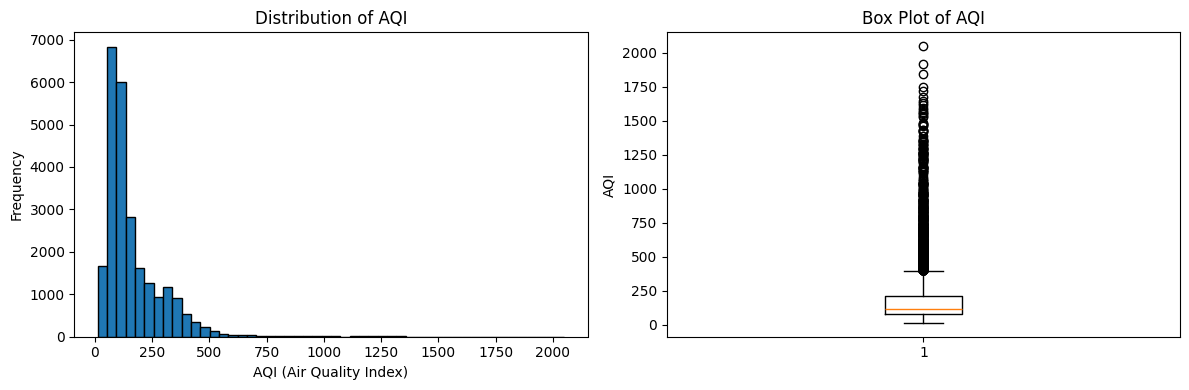

AQI Statistics:
Mean: 166.46
Median: 118.00
Min: 13.00
Max: 2049.00


In [10]:
# Exploratory Data Analysis
# Distribution of target variable (AQI)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df_processed['AQI'], bins=50, edgecolor='black')
plt.xlabel('AQI (Air Quality Index)')
plt.ylabel('Frequency')
plt.title('Distribution of AQI')

plt.subplot(1, 2, 2)
plt.boxplot(df_processed['AQI'])
plt.ylabel('AQI')
plt.title('Box Plot of AQI')

plt.tight_layout()
plt.show()

print(f"AQI Statistics:")
print(f"Mean: {df_processed['AQI'].mean():.2f}")
print(f"Median: {df_processed['AQI'].median():.2f}")
print(f"Min: {df_processed['AQI'].min():.2f}")
print(f"Max: {df_processed['AQI'].max():.2f}")

In [11]:
# Outlier Detection using IQR Method
def remove_outliers_iqr(df, exclude_cols=None):
    if exclude_cols is None:
        exclude_cols = []

    df_clean = df.copy()
    numerical_cols = df_clean.select_dtypes(include=np.number).columns
    numerical_cols = [col for col in numerical_cols if col not in exclude_cols]

    Q1 = df_clean[numerical_cols].quantile(0.25)
    Q3 = df_clean[numerical_cols].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    mask = ~((df_clean[numerical_cols] < lower_bound) | (df_clean[numerical_cols] > upper_bound)).any(axis=1)
    return df_clean[mask]

# Remove outliers (excluding the target variable from outlier removal)
df_clean = remove_outliers_iqr(df_processed, exclude_cols=['AQI'])
print(f"Dataset shape before outlier removal: {df_processed.shape}")
print(f"Dataset shape after outlier removal: {df_clean.shape}")
print(f"Rows removed: {df_processed.shape[0] - df_clean.shape[0]}")

Dataset shape before outlier removal: (24850, 19)
Dataset shape after outlier removal: (9541, 19)
Rows removed: 15309


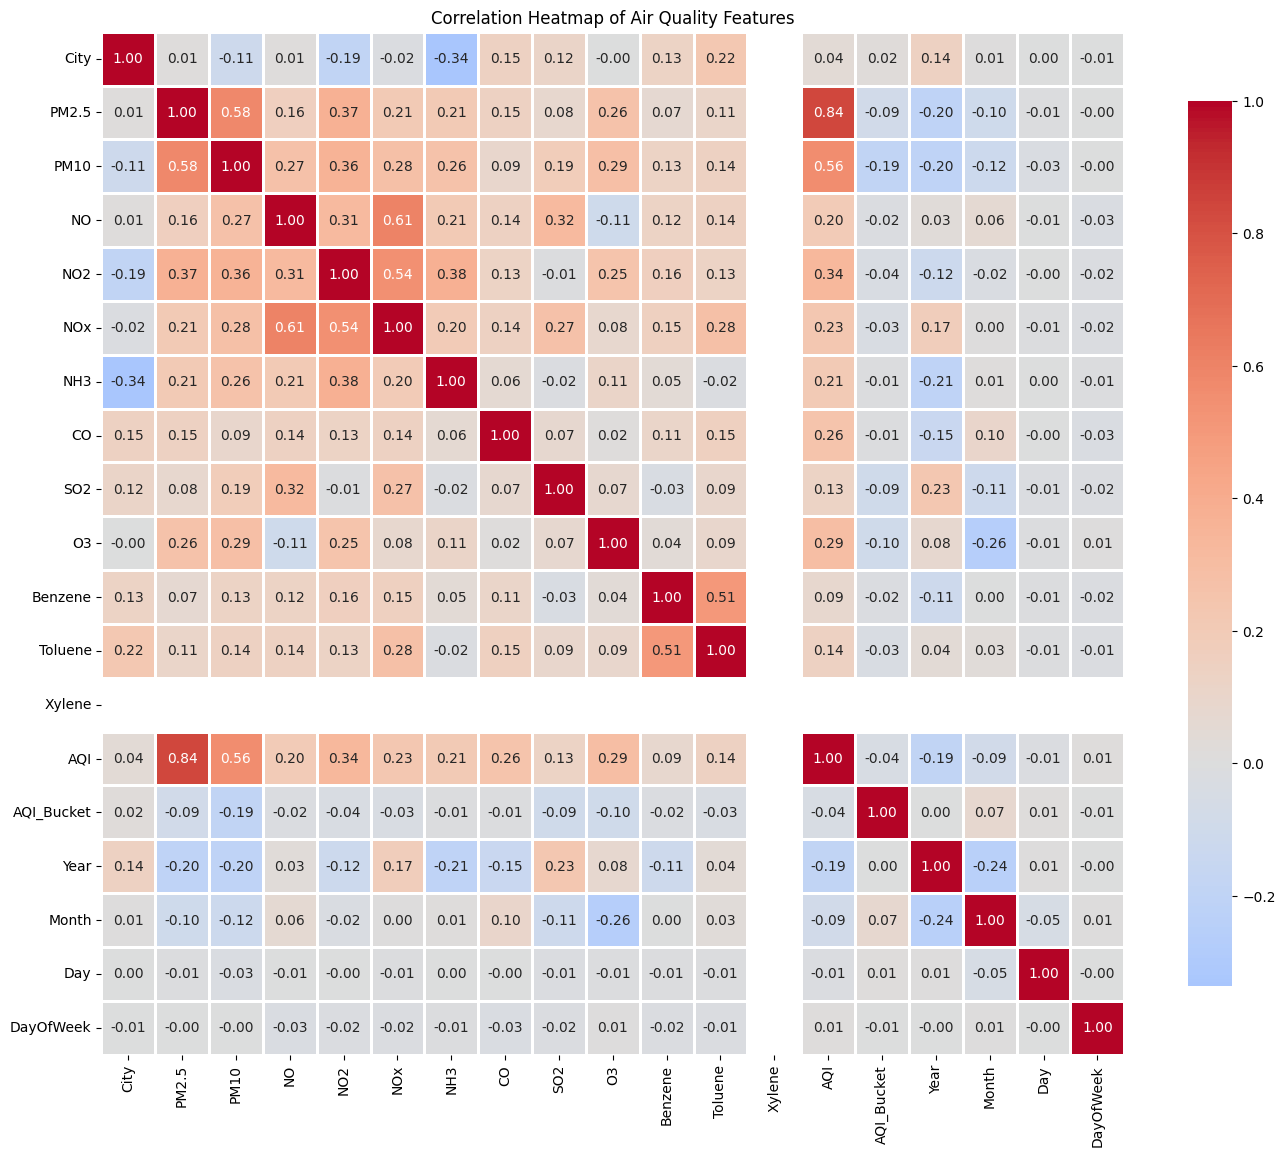


Correlation with AQI (sorted by absolute value):
AQI           1.000000
PM2.5         0.837247
PM10          0.557922
NO2           0.335734
O3            0.291424
CO            0.257652
NOx           0.228158
NH3           0.206305
NO            0.199524
Toluene       0.141234
SO2           0.131419
Benzene       0.085116
City          0.039890
DayOfWeek     0.012082
Day          -0.012554
AQI_Bucket   -0.042600
Month        -0.088214
Year         -0.193532
Xylene             NaN
Name: AQI, dtype: float64


In [12]:
# Correlation Heatmap
plt.figure(figsize=(14, 12))
numerical_df = df_clean.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Air Quality Features')
plt.tight_layout()
plt.show()

# Show correlation with AQI
print("\nCorrelation with AQI (sorted by absolute value):")
aqi_corr = correlation_matrix['AQI'].sort_values(ascending=False)
print(aqi_corr)

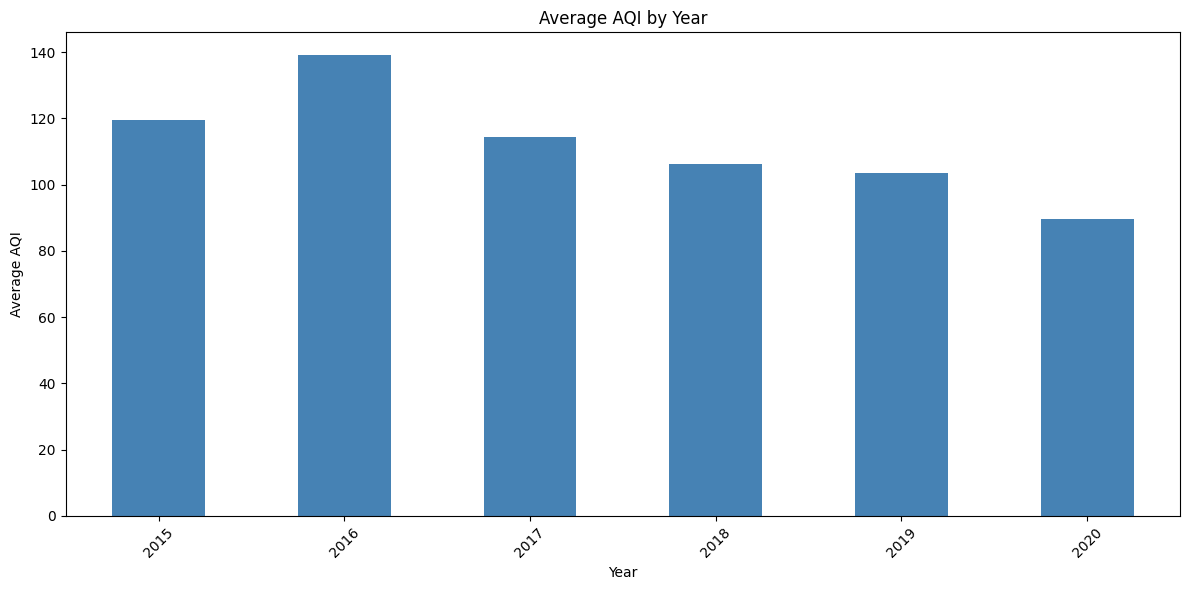

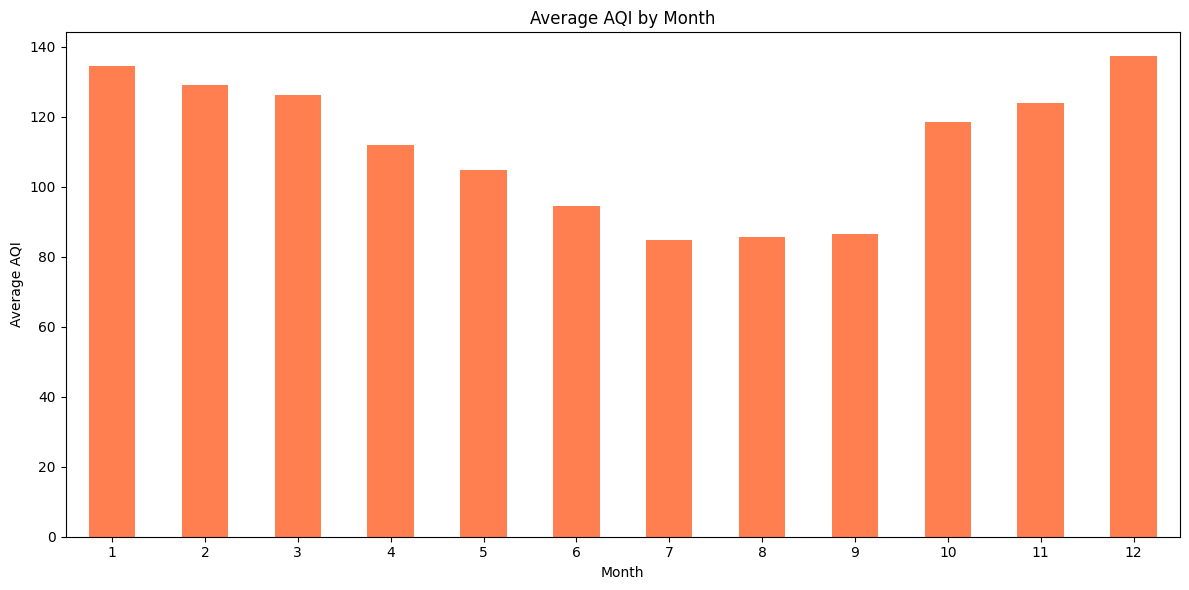

In [13]:
# AQI distribution by year
plt.figure(figsize=(12, 6))
df_clean.groupby('Year')['AQI'].mean().plot(kind='bar', color='steelblue')
plt.xlabel('Year')
plt.ylabel('Average AQI')
plt.title('Average AQI by Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# AQI distribution by month
plt.figure(figsize=(12, 6))
df_clean.groupby('Month')['AQI'].mean().plot(kind='bar', color='coral')
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.title('Average AQI by Month')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [14]:
# Prepare data for modeling
# Drop AQI_Bucket as it's derived from AQI (our target)
columns_to_drop = ['AQI_Bucket'] if 'AQI_Bucket' in df_clean.columns else []
df_model = df_clean.drop(columns=columns_to_drop)

# Separate features and target
X = df_model.drop(columns=['AQI'])
y = df_model['AQI']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeatures: {X.columns.tolist()}")

Features shape: (9541, 17)
Target shape: (9541,)

Features: ['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'Year', 'Month', 'Day', 'DayOfWeek']


In [15]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train_scaled.shape}")
print(f"Test set size: {X_test_scaled.shape}")

Training set size: (7632, 17)
Test set size: (1909, 17)


In [16]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(random_state=42),
    'Lasso Regression': Lasso(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100)
}

# Train and evaluate all models
model_results = {}

print("Model Training and Evaluation:\n")
print("="*80)

for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Cross-validation score
    cv_scores = cross_val_score(model, X_train_scaled, y_train,
                                cv=5, scoring='r2')

    # Store results
    model_results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'R2 Score': r2,
        'CV R2 Mean': cv_scores.mean(),
        'CV R2 Std': cv_scores.std()
    }

    print(f"{name} Performance:")
    print(f"  MSE: {mse:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R2 Score: {r2:.4f}")
    print(f"  Cross-Validation R2: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")
    print("-"*80)

Model Training and Evaluation:

Linear Regression Performance:
  MSE: 1025.02
  RMSE: 32.02
  R2 Score: 0.7124
  Cross-Validation R2: 0.7411 (+/- 0.0242)
--------------------------------------------------------------------------------
Ridge Regression Performance:
  MSE: 1025.01
  RMSE: 32.02
  R2 Score: 0.7124
  Cross-Validation R2: 0.7411 (+/- 0.0242)
--------------------------------------------------------------------------------
Lasso Regression Performance:
  MSE: 1035.82
  RMSE: 32.18
  R2 Score: 0.7094
  Cross-Validation R2: 0.7391 (+/- 0.0244)
--------------------------------------------------------------------------------
Decision Tree Performance:
  MSE: 1810.62
  RMSE: 42.55
  R2 Score: 0.4920
  Cross-Validation R2: 0.5929 (+/- 0.0384)
--------------------------------------------------------------------------------
Random Forest Performance:
  MSE: 852.43
  RMSE: 29.20
  R2 Score: 0.7609
  Cross-Validation R2: 0.7943 (+/- 0.0308)
---------------------------------------------

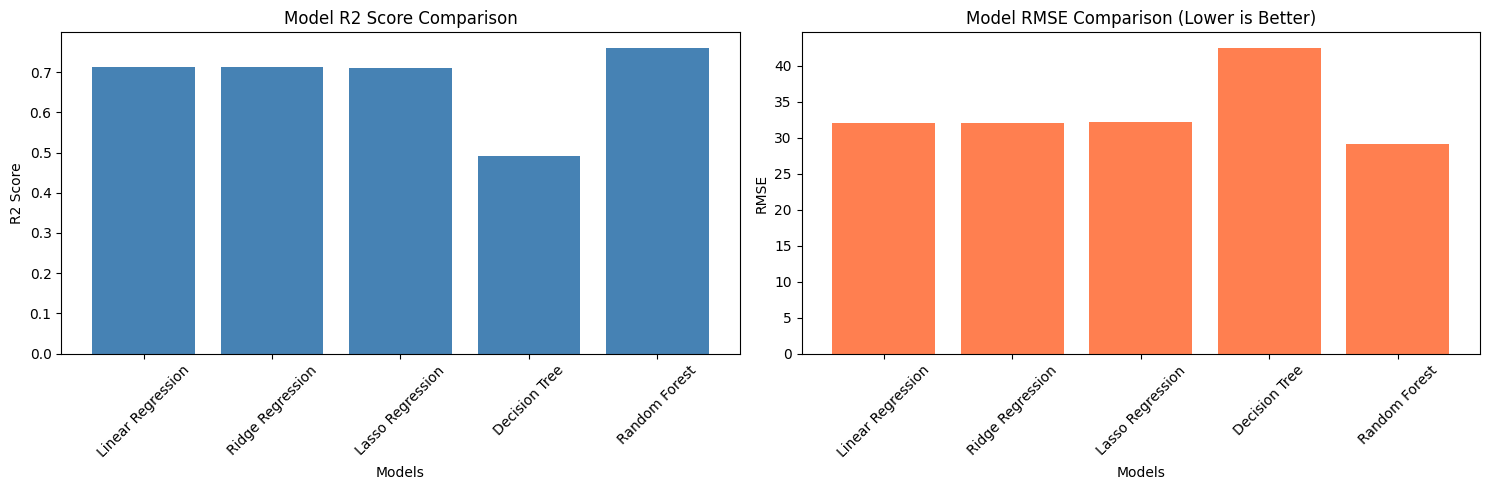

In [17]:
# Visualize Model Performance
model_names = list(model_results.keys())
r2_scores = [model_results[name]['R2 Score'] for name in model_names]
rmse_scores = [model_results[name]['RMSE'] for name in model_names]

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# R2 Score comparison
axes[0].bar(model_names, r2_scores, color='steelblue')
axes[0].set_xlabel('Models')
axes[0].set_ylabel('R2 Score')
axes[0].set_title('Model R2 Score Comparison')
axes[0].tick_params(axis='x', rotation=45)

# RMSE comparison
axes[1].bar(model_names, rmse_scores, color='coral')
axes[1].set_xlabel('Models')
axes[1].set_ylabel('RMSE')
axes[1].set_title('Model RMSE Comparison (Lower is Better)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [18]:
# Hyperparameter Optimization using GridSearchCV
param_grid = {
    'Ridge Regression': {'alpha': [0.1, 1, 10, 100]},
    'Lasso Regression': {'alpha': [0.1, 1, 10, 100]},
    'Decision Tree': {'max_depth': [5, 10, 15, 20], 'min_samples_split': [2, 5, 10]},
    'Random Forest': {'n_estimators': [50, 100], 'max_depth': [10, 15]}  # Reduced for faster tuning
}

best_models = {}

print("Hyperparameter Tuning Results:\n")
print("="*80)

for name, model in models.items():
    if name in param_grid:
        print(f"\nTuning {name}...")
        grid_search = GridSearchCV(
            model,
            param_grid[name],
            cv=5,
            scoring='neg_mean_squared_error',
            n_jobs=-1
        )
        grid_search.fit(X_train_scaled, y_train)
        best_models[name] = grid_search.best_estimator_
        print(f"Best parameters for {name}: {grid_search.best_params_}")
        print(f"Best CV score: {-grid_search.best_score_:.2f}")

print("\n" + "="*80)

Hyperparameter Tuning Results:


Tuning Ridge Regression...
Best parameters for Ridge Regression: {'alpha': 10}
Best CV score: 895.37

Tuning Lasso Regression...
Best parameters for Lasso Regression: {'alpha': 0.1}
Best CV score: 895.35

Tuning Decision Tree...
Best parameters for Decision Tree: {'max_depth': 5, 'min_samples_split': 5}
Best CV score: 860.68

Tuning Random Forest...
Best parameters for Random Forest: {'max_depth': 15, 'n_estimators': 100}
Best CV score: 712.84




Selected Top 10 Features using RFE:
1. PM2.5
2. PM10
3. NO
4. NO2
5. CO
6. SO2
7. O3
8. Toluene
9. Year
10. DayOfWeek

Top 10 Features by Random Forest Importance:
    feature  importance
1     PM2.5    0.700466
2      PM10    0.082447
7        CO    0.041853
9        O3    0.036053
8       SO2    0.018486
4       NO2    0.015846
3        NO    0.014683
5       NOx    0.012939
15      Day    0.012873
11  Toluene    0.011503


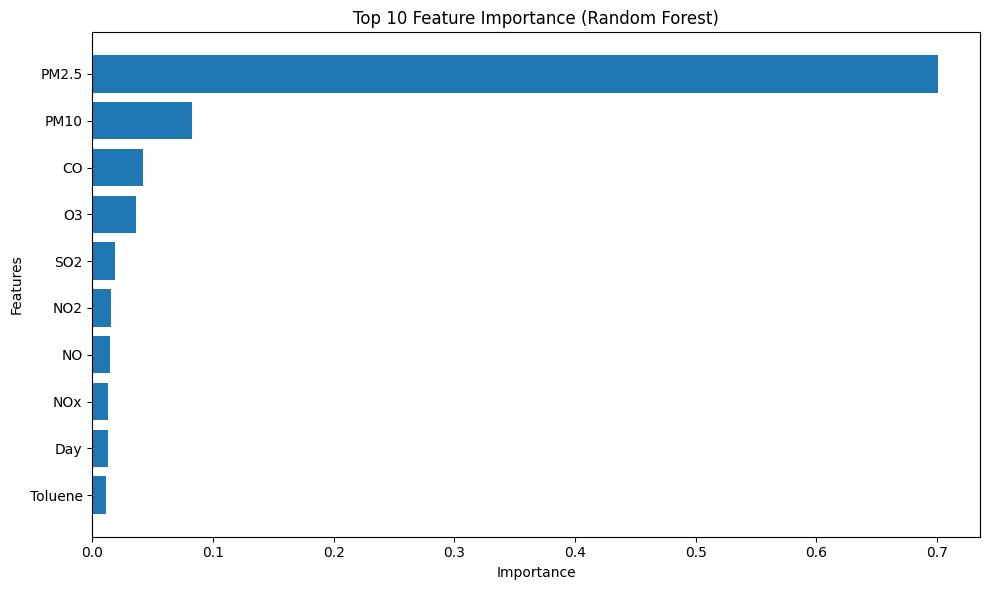

In [19]:
# Feature Selection using Recursive Feature Elimination (RFE)
n_features = min(10, X.shape[1])  # Select top 10 features or all if less
rfe = RFE(LinearRegression(), n_features_to_select=n_features)
rfe.fit(X_train_scaled, y_train)

selected_features = X.columns[rfe.support_]
print(f"\nSelected Top {n_features} Features using RFE:")
for i, feature in enumerate(selected_features, 1):
    print(f"{i}. {feature}")

# Feature importance from Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Features by Random Forest Importance:")
print(feature_importance.head(10))

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'].head(10), feature_importance['importance'].head(10))
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importance (Random Forest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [20]:
# Final Model Evaluation with Tuned Hyperparameters
print("\nFinal Model Performance (After Hyperparameter Tuning):\n")
print("="*80)

for name, model in best_models.items():
    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Update results
    model_results[name] = {'MSE': mse, 'RMSE': rmse, 'R2 Score': r2}

    print(f"{name} Performance:")
    print(f"  MSE: {mse:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R2 Score: {r2:.4f}")
    print("-"*80)


Final Model Performance (After Hyperparameter Tuning):

Ridge Regression Performance:
  MSE: 1024.94
  RMSE: 32.01
  R2 Score: 0.7125
--------------------------------------------------------------------------------
Lasso Regression Performance:
  MSE: 1024.86
  RMSE: 32.01
  R2 Score: 0.7125
--------------------------------------------------------------------------------
Decision Tree Performance:
  MSE: 1031.38
  RMSE: 32.12
  R2 Score: 0.7106
--------------------------------------------------------------------------------
Random Forest Performance:
  MSE: 859.92
  RMSE: 29.32
  R2 Score: 0.7588
--------------------------------------------------------------------------------


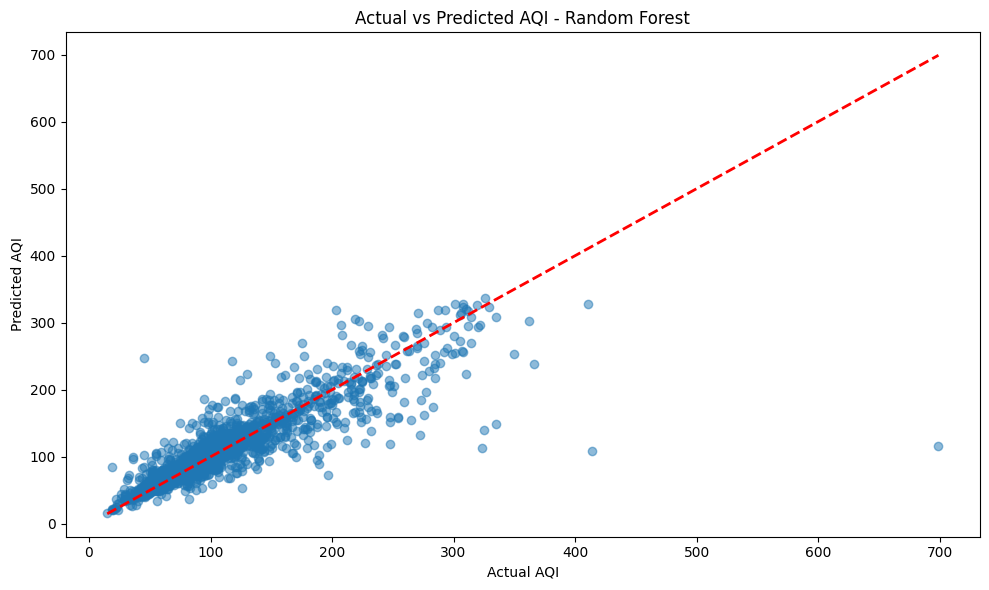

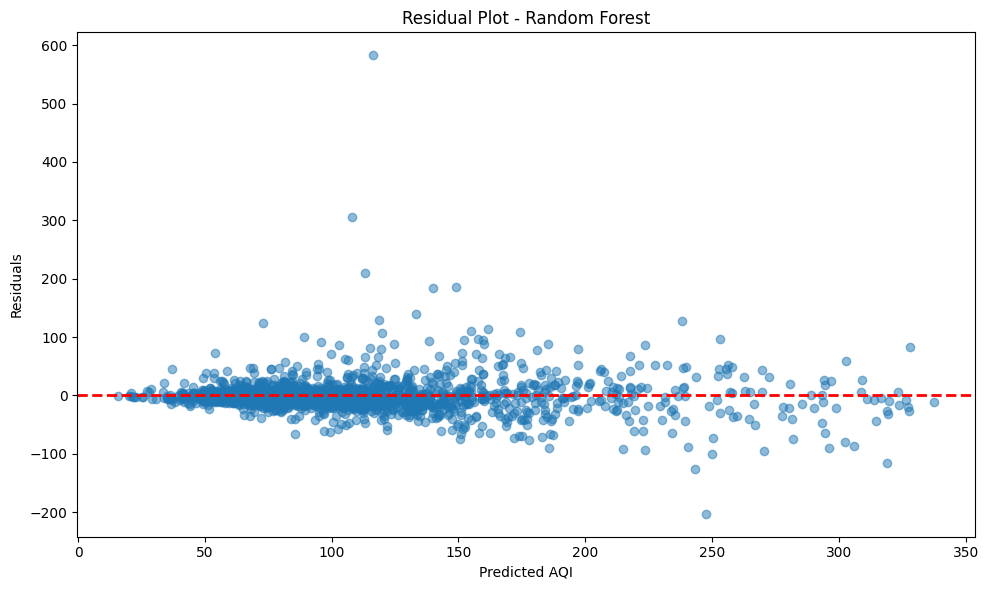

In [21]:
# Prediction vs Actual for Best Model
best_model_name = max(model_results, key=lambda name: model_results[name]['R2 Score'])
best_model = best_models.get(best_model_name, models[best_model_name])

y_pred_best = best_model.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title(f'Actual vs Predicted AQI - {best_model_name}')
plt.tight_layout()
plt.show()

# Residual plot
residuals = y_test - y_pred_best
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_best, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted AQI')
plt.ylabel('Residuals')
plt.title(f'Residual Plot - {best_model_name}')
plt.tight_layout()
plt.show()

In [22]:
# Conclusion and Summary
print("\n" + "="*80)
print("CONCLUSION: Model Performance Summary")
print("="*80 + "\n")

# Create a results dataframe
results_df = pd.DataFrame(model_results).T
results_df = results_df.sort_values('R2 Score', ascending=False)

print(results_df.to_string())

print(f"\n{'='*80}")
print(f"\nBest Performing Model: {best_model_name}")
print(f"R2 Score: {model_results[best_model_name]['R2 Score']:.4f}")
print(f"RMSE: {model_results[best_model_name]['RMSE']:.2f}")
print(f"\n{'='*80}")

print("\nKey Findings:")
print(f"1. The {best_model_name} achieved the highest R2 score of {model_results[best_model_name]['R2 Score']:.4f}")
print(f"2. The model explains {model_results[best_model_name]['R2 Score']*100:.2f}% of the variance in AQI values")
print(f"3. Average prediction error (RMSE): {model_results[best_model_name]['RMSE']:.2f} AQI units")
print(f"4. Top predictive features include: {', '.join(feature_importance['feature'].head(3).tolist())}")
print("\nThis model can be used to predict air quality index based on pollutant measurements,")
print("which can help in air quality monitoring and early warning systems.")


CONCLUSION: Model Performance Summary

                           MSE       RMSE  R2 Score  CV R2 Mean  CV R2 Std
Random Forest       859.921716  29.324422  0.758751         NaN        NaN
Lasso Regression   1024.864821  32.013510  0.712476         NaN        NaN
Ridge Regression   1024.936167  32.014624  0.712456         NaN        NaN
Linear Regression  1025.016384  32.015877  0.712434    0.741121   0.024174
Decision Tree      1031.376389  32.115049  0.710649         NaN        NaN


Best Performing Model: Random Forest
R2 Score: 0.7588
RMSE: 29.32


Key Findings:
1. The Random Forest achieved the highest R2 score of 0.7588
2. The model explains 75.88% of the variance in AQI values
3. Average prediction error (RMSE): 29.32 AQI units
4. Top predictive features include: PM2.5, PM10, CO

This model can be used to predict air quality index based on pollutant measurements,
which can help in air quality monitoring and early warning systems.
